In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats  import zscore,skew,normaltest

df = pd.read_csv("C:\\Users\\USER\\Downloads\\Employee.csv")


In [5]:
print("First 10 rows of the dataset:")
print(df.head(10))

# Shape of the dataset
print("\nNumber of rows and columns:", df.shape)

# Data types and non-null counts
print("\nData Types and Missing Values:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Count missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())
# to remove duplicates
df = df.drop_duplicates()



First 10 rows of the dataset:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0
5  Infosys   NaN  5000.0  Calcutta   India       0
6      TCS   NaN  6000.0   Chennai   India       1
7  Infosys  23.0  7000.0    Mumbai   India       1
8      TCS  34.0  8000.0  Calcutta   India       1
9      CTS  45.0  9000.0     Delhi   India       0

Number of rows and columns: (144, 6)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country

In [7]:
## to get unique values in each column
for col in df.columns:
    print(f"Column: {col}")
    print("Unique values:", df[col].unique())
    print("Number of unique values:", len(df[col].unique()))
    print("\n")

Column: Company
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values: 7


Column: Age
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values: 30


Column: Salary
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values: 41


Column: Place
Unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values: 12


Column: Country
Unique values: ['India']
Number of unique values: 1


Column: Gender
Unique values: [0 1]
Number of unique values: 2




In [9]:
## Rename columns to lowercase with underscores
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
print("\nRenamed Columns:", df.columns.tolist())



Renamed Columns: ['company', 'age', 'salary', 'place', 'country', 'gender']


In [11]:
for col in df.columns:
 print(df[col]. value_counts())
  

company
TCS                          52
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
age
22.0    15
33.0    13
44.0    10
23.0     8
34.0     8
32.0     7
21.0     7
35.0     6
0.0      6
41.0     5
45.0     4
24.0     4
20.0     3
31.0     3
43.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64
salary
3000.0    9
5000.0    6
8202.0    5
5034.0    5
4034.0    5
2300.0    4
7084.0    4
9024.0    4
2934.0    4
9284.0    4
8345.0    4
8943.0    4
2034.0    4
3184.0    4
3045.0    4
1234.0    4
1089.0    4
4824.0    3
5835.0    3
3030.0    3
8787.0    3
9000.0    3
8000.0    3
7000.0    3
6000.0    3
3234.0    2
4000.0    2
7654.0    2
9876.0    2
4345.0    1
6544.0    1
6543.0    1
4324.0    1
5435.0    1
5555.0    

In [15]:
#  age == 0 as NaN 
if 'age' in df.columns:
    df['age'] = df['age'].replace(0, np.nan)

In [17]:
##Find and treat missing values
print("\nMissing values before:", df.isnull().sum())
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
print("Missing values after:", df.isnull().sum())



Missing values before: company     8
age        23
salary     23
place      14
country     0
gender      0
dtype: int64
Missing values after: company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_5936\296840392.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_5936\296840392.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [19]:
###Detect outliers using IQR (example for age and salary)
for col in ['age', 'salary']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"Outliers in {col}:", ((df[col] < lower) | (df[col] > upper)).sum())

Outliers in age: 0
Outliers in salary: 0


In [23]:
 ##Filter
filtered = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("Filtered Rows:", filtered.shape[0])
print(filtered)


Filtered Rows: 15
     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


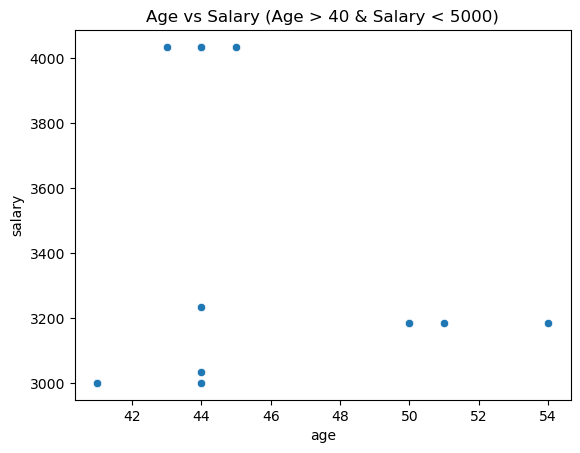

In [25]:
##Scatter plot: age vs salary
sns.scatterplot(x=filtered['age'], y=filtered['salary'])
plt.title("Age vs Salary (Age > 40 & Salary < 5000)")
plt.show()

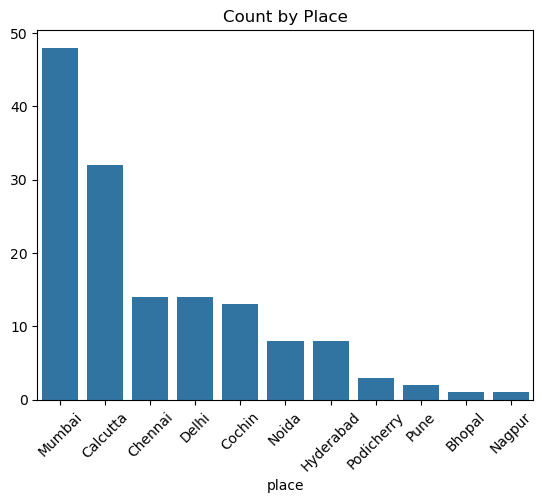

In [27]:
##Count of people by place
if 'place' in df.columns:
    counts = df['place'].value_counts()
    sns.barplot(x=counts.index, y=counts.values)
    plt.xticks(rotation=45)
    plt.title("Count by Place")
    plt.show()

In [29]:
## data encoding
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

# Label encode
for col in cat_cols:
    df[col + '_label'] = le.fit_transform(df[col])
    print(f"Mapping for {col}:", dict(zip(le.classes_, le.transform(le.classes_))))


Mapping for company: {'CTS': 0, 'Congnizant': 1, 'Infosys': 2, 'Infosys Pvt Lmt': 3, 'TCS': 4, 'Tata Consultancy Services': 5}
Mapping for place: {'Bhopal': 0, 'Calcutta': 1, 'Chennai': 2, 'Cochin': 3, 'Delhi': 4, 'Hyderabad': 5, 'Mumbai': 6, 'Nagpur': 7, 'Noida': 8, 'Podicherry': 9, 'Pune': 10}
Mapping for country: {'India': 0}


In [33]:
##scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("Scaled numeric columns. Sample data:\n", df[num_cols].head())



Scaled numeric columns. Sample data:
         age    salary    gender
0 -1.484676 -0.100827 -0.534522
1 -0.267174 -0.100827 -0.534522
2  0.341577 -1.243735 -0.534522
3  0.950328 -0.947426 -0.534522
4 -1.119426 -0.524127 -0.534522
